In [1]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
names =   [
    "Hāku patāsi",
    "Nyapu Shikha",
    "Tapalan",
    "Haku Tapli",
    "Hansuli",
    "Mangiya",
    "Ali Band",
    "Bijaith",
    "tharu_waist_chain",
    "tharu_head_cloth",
    "kanthula",
    "tharu_broad_wrist_band",
    "Sirbandi",
    "Chura",
    "potey",
    "patuki",
    "dori",
    "dhungri",
    "gunyo",
    "cholo",
    "sirful",
    "teekma",
    "naugedi",
    "chyapte_sun",
  ]

In [3]:
DATA_PATH = "nepali-cultural-dress-and-ornaments"

In [4]:
!cp -r  /kaggle/input/nepali-cultural-dress-and-ornaments .

In [5]:
text = f"""
train: ./train
val: ./test

nc: 24
names:
    [
    "Hāku patāsi",
    "Nyapu Shikha",
    "Tapalan",
    "Haku Tapli",
    "Hansuli",
    "Mangiya",
    "Ali Band",
    "Bijaith",
    "tharu_waist_chain",
    "tharu_head_cloth",
    "kanthula",
    "tharu_broad_wrist_band",
    "Sirbandi",
    "Chura",
    "potey",
    "patuki",
    "dori",
    "dhungri",
    "gunyo",
    "cholo",
    "sirful",
    "teekma",
    "naugedi",
    "chyapte_sun",
  ]

"""
yaml_file = DATA_PATH+"/data.yaml"

with open(yaml_file,"w") as f:
  # print(text)
  f.write(text)

In [6]:
!pip install -U ultralytics --quiet

In [7]:
import os
os.environ['WANDB_DISABLED'] = 'true'

In [8]:
! yolo task=detect \
mode=train \
model=yolov8s.pt \
data=/kaggle/working/nepali-cultural-dress-and-ornaments/data.yaml \
epochs=20 \
batch = 32 \
imgsz=640

100%|██████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 49.3MB/s]
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/nepali-cultural-dress-and-ornaments/data.yaml, epochs=20, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=

In [9]:
# !rm -r runs wandb 

In [10]:
%reload_ext tensorboard
%tensorboard --logdir runs/detect/train

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11134872 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /kaggle/working/beauty.jpg: 640x544 1 Sirbandi, 1 patuki, 1 gunyo, 1 sirful, 1 teekma, 58.2ms
Speed: 4.9ms preprocess, 58.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11134872 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /kaggle/working/limbu.jpg: 640x640 1 Sirbandi, 1 sirful, 7.2ms
Speed: 6.6ms preprocess, 7.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 1

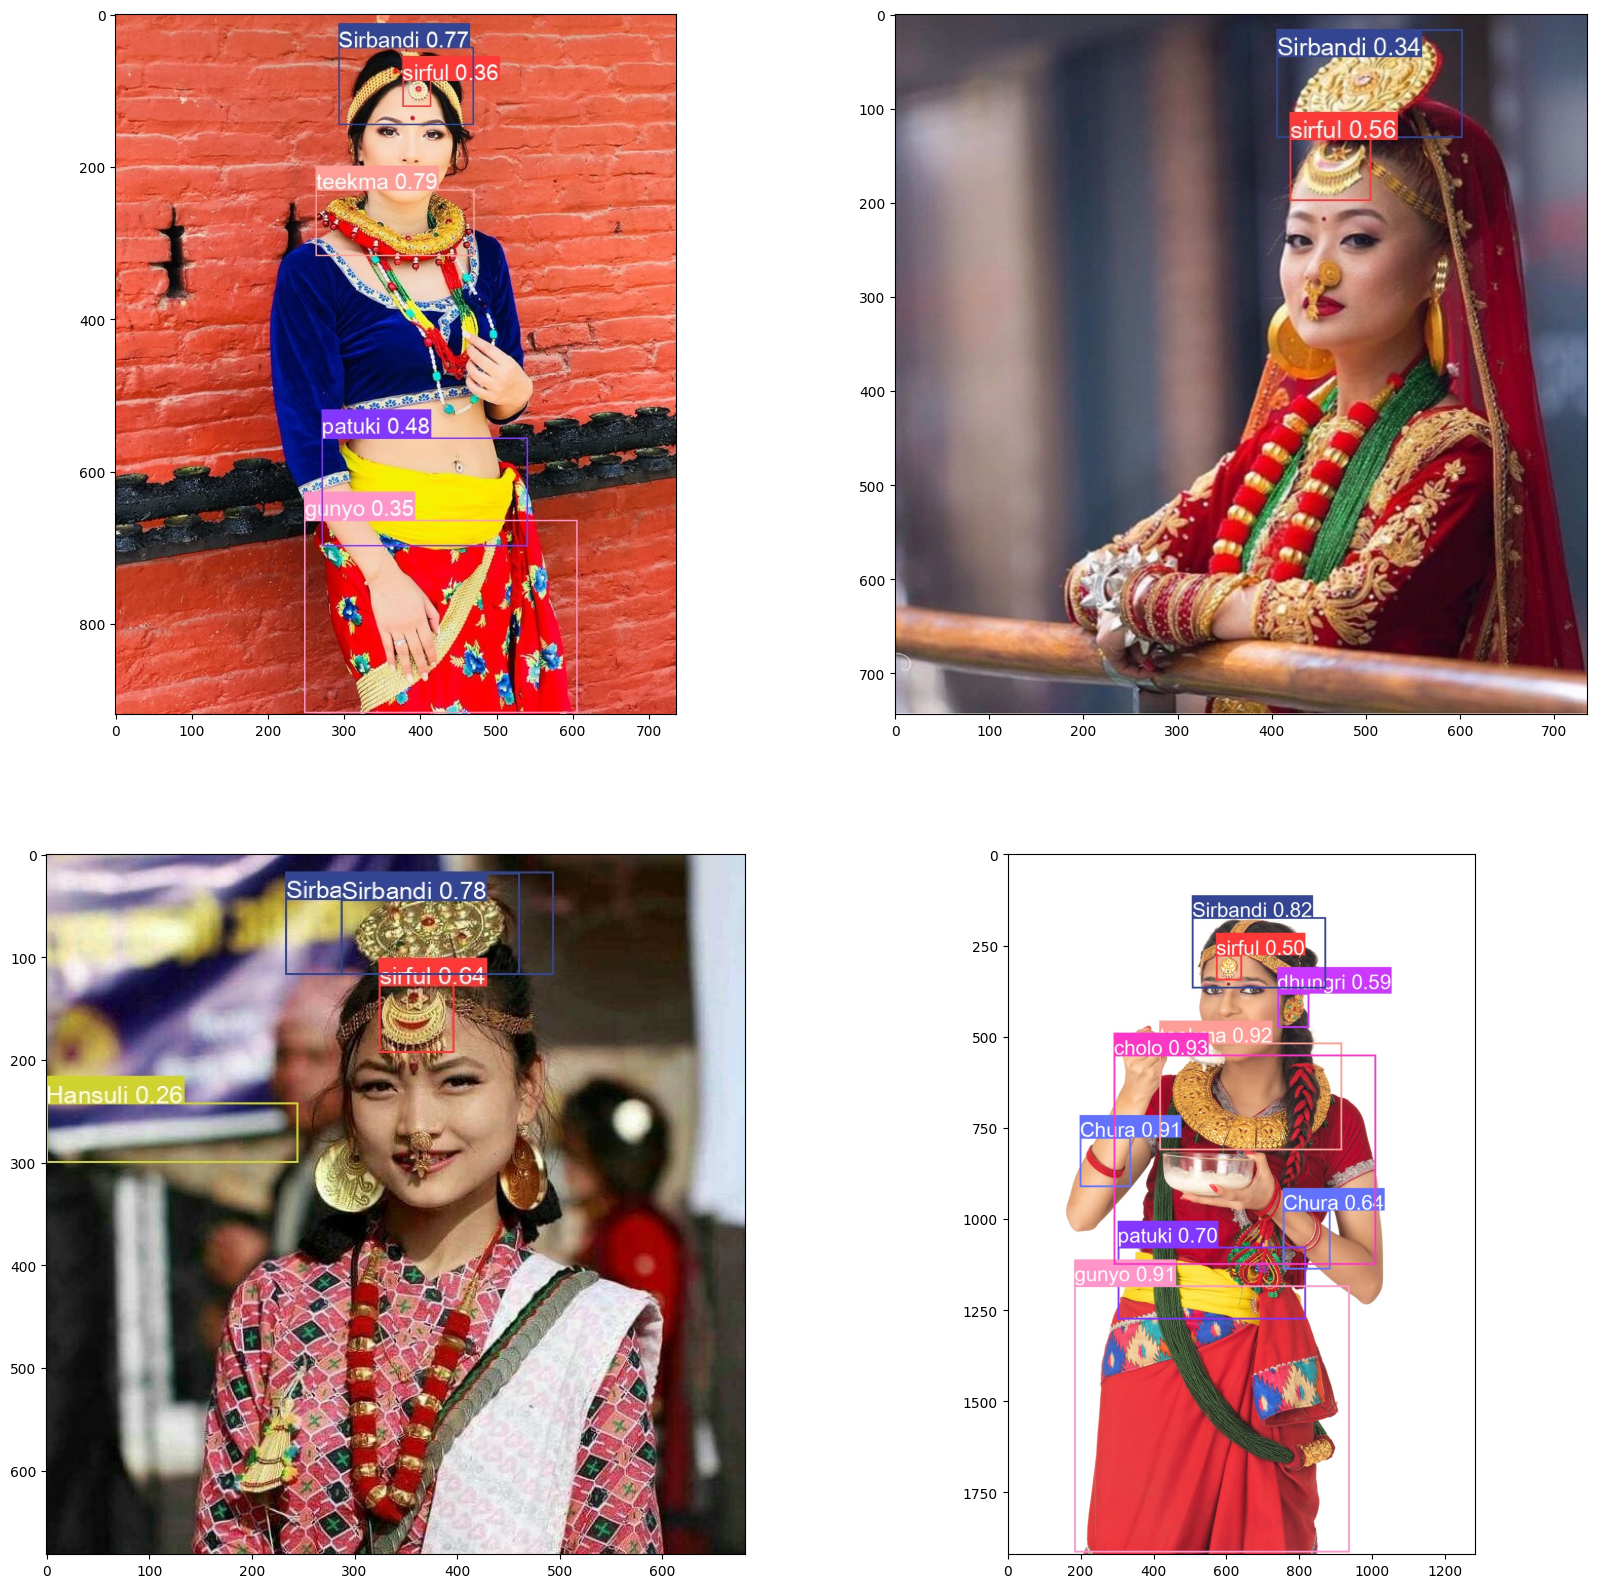

In [11]:
!wget https://i.pinimg.com/736x/f4/72/3f/f4723f47e864732aa9e55370e3a02489.jpg -O beauty.jpg -q
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="beauty.jpg"


!wget https://i.pinimg.com/originals/dc/74/d9/dc74d9c8c5b122d83668e5421602bf16.jpg -O limbu.jpg -q
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="limbu.jpg"


!wget https://i.pinimg.com/originals/68/b7/24/68b7242cfd9f7d7a1db7bbdbb9dc96ff.jpg -O kirat.jpg -q
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="kirat.jpg"


!wget https://files.photosnepal.com/preview/2022/11/a-pretty-girl-tasting-spoonful-of-dahi-78pxuj11p.jpg -O bauni.jpg -q
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="bauni.jpg"


plt.figure(figsize=(20,20))
for i in range(1,5):
  plt.subplot(2,2,i)
  folder = "runs/detect/predict{}".format(i if i>1 else "")
  fil = os.listdir(folder)
  print(folder,fil)
  image = mpimg.imread(folder+"/"+fil[0])
  plt.imshow(image,cmap="gray")